In [1]:
# Import the os library to interact with the operating system, like navigating directories.
import os

# Import the Image module from the PIL (Pillow) library for image manipulation.
from PIL import Image

In [2]:
# Define the path to the original dataset provided.
input_dir = "/kaggle/input/pre-process-data/For-pre-process"

# Define the path where the resized images will be saved.
output_dir = "/kaggle/working/resized-data"

# Check if the output directory exists, if not, create it.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define your categories based on your dataset structure
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

print("Setting up label encoding...")
print(f"Categories found: {categories}")

# Create label encoder
label_encoder = LabelEncoder()
label_encoder.fit(categories)

# Show label mappings
print("\nLabel Mappings:")
for i, category in enumerate(categories):
    print(f"{category} -> {i}")


Setting up label encoding...
Categories found: ['cardboard', 'glass', 'metal', 'paper', 'plastic']

Label Mappings:
cardboard -> 0
glass -> 1
metal -> 2
paper -> 3
plastic -> 4


In [14]:
# Create labels list for your preprocessed images
image_labels = []
image_categories = []

# Path to your preprocessed data
input_directory = "/kaggle/input/pre-process-data/For-pre-process"

print("Creating labels for images...")

for category in categories:
    category_path = os.path.join(input_directory, category)
    
    if os.path.exists(category_path):
        # Count images in this category
        image_files = [f for f in os.listdir(category_path) 
                      if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        image_count = len(image_files)
        print(f"{category}: {image_count} images")
        
        # Create labels for this category
        category_labels = [category] * image_count
        category_encoded = label_encoder.transform([category]) * image_count
        
        # Add to main lists
        image_categories.extend(category_labels)
        image_labels.extend(category_encoded[0] * np.ones(image_count, dtype=int))

# Convert to numpy arrays
image_labels = np.array(image_labels)
image_categories = np.array(image_categories)

print(f"\nTotal labels created: {len(image_labels)}")
print(f"Label distribution:")
for category in categories:
    count = np.sum(image_categories == category)
    encoded_value = label_encoder.transform([category])[0]
    print(f"  {category} (label {encoded_value}): {count} images")


Creating labels for images...
cardboard: 2000 images
glass: 2000 images
metal: 2000 images
paper: 2000 images
plastic: 2000 images

Total labels created: 10000
Label distribution:
  cardboard (label 0): 2000 images
  glass (label 1): 2000 images
  metal (label 2): 2000 images
  paper (label 3): 2000 images
  plastic (label 4): 2000 images


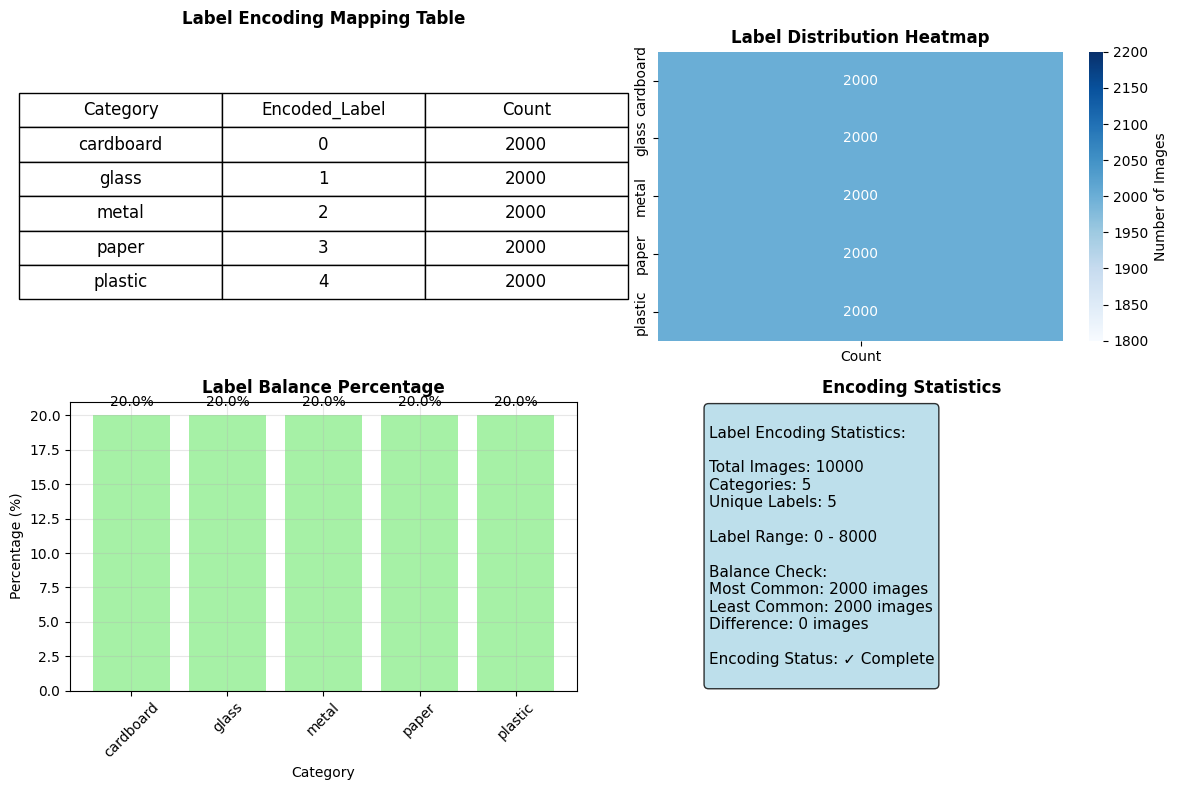

Label encoding verification completed


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create mapping visualization
plt.figure(figsize=(12, 8))

# Label mapping table visualization
plt.subplot(2, 2, 1)
mapping_data = []
for category in categories:
    encoded_value = label_encoder.transform([category])[0]
    count = np.sum(image_categories == category)
    mapping_data.append([category, encoded_value, count])

mapping_df = pd.DataFrame(mapping_data, columns=['Category', 'Encoded_Label', 'Count'])
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=mapping_df.values,
                 colLabels=mapping_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)
plt.title('Label Encoding Mapping Table', fontweight='bold', pad=20)

# Heatmap showing label distribution
plt.subplot(2, 2, 2)
label_matrix = np.zeros((len(categories), 1))
for i, category in enumerate(categories):
    count = np.sum(image_categories == category)
    label_matrix[i, 0] = count

sns.heatmap(label_matrix, annot=True, fmt='.0f', cmap='Blues',
           yticklabels=categories, xticklabels=['Count'],
           cbar_kws={'label': 'Number of Images'})
plt.title('Label Distribution Heatmap', fontweight='bold')

# Label balance visualization
plt.subplot(2, 2, 3)
label_balance = []
total_images = len(image_labels)
for category in categories:
    count = np.sum(image_categories == category)
    percentage = (count / total_images) * 100
    label_balance.append(percentage)

plt.bar(categories, label_balance, color='lightgreen', alpha=0.8)
plt.title('Label Balance Percentage', fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
for i, v in enumerate(label_balance):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Label encoding statistics
plt.subplot(2, 2, 4)
stats_text = f"""
Label Encoding Statistics:

Total Images: {len(image_labels)}
Categories: {len(categories)}
Unique Labels: {len(np.unique(image_labels))}

Label Range: {np.min(image_labels)} - {np.max(image_labels)}

Balance Check:
Most Common: {category_counts.max()} images
Least Common: {category_counts.min()} images
Difference: {category_counts.max() - category_counts.min()} images

Encoding Status: ✓ Complete
"""
plt.text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
plt.axis('off')
plt.title('Encoding Statistics', fontweight='bold')

plt.tight_layout()
plt.show()

print("Label encoding verification completed")





In [22]:
# Create comprehensive summary
print("="*60)
print("LABEL ENCODING EDA SUMMARY")
print("="*60)

# Summary statistics
summary_data = {
    'Category': [],
    'Encoded_Label': [],
    'Image_Count': [],
    'Percentage': [],
    'Mean_Pixel': [],
    'Std_Pixel': []
}

for category in categories:
    encoded_label = label_encoder.transform([category])[0]
    count = np.sum(image_categories == category)
    percentage = (count / len(image_labels)) * 100
    
    cat_data = labeled_df[labeled_df['category'] == category]
    mean_pixel = cat_data['mean_value'].mean()
    std_pixel = cat_data['std_value'].mean()
    
    summary_data['Category'].append(category)
    summary_data['Encoded_Label'].append(encoded_label)
    summary_data['Image_Count'].append(count)
    summary_data['Percentage'].append(percentage)
    summary_data['Mean_Pixel'].append(mean_pixel)
    summary_data['Std_Pixel'].append(std_pixel)

summary_df = pd.DataFrame(summary_data)
print("\nDetailed Summary:")
print(summary_df.round(2))

# Check for class imbalance
max_count = summary_df['Image_Count'].max()
min_count = summary_df['Image_Count'].min()
imbalance_ratio = max_count / min_count

print(f"\nClass Balance Analysis:")
print(f"Most images: {max_count}")
print(f"Least images: {min_count}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 2:
    print("⚠️  Dataset is imbalanced - consider balancing techniques")
else:
    print("✅ Dataset is reasonably balanced")

print(f"\nEncoding Verification:")
print(f"✅ Total images encoded: {len(image_labels)}")
print(f"✅ Categories encoded: {len(categories)}")
print(f"✅ Label range: {np.min(image_labels)} to {np.max(image_labels)}")
print("✅ Label encoding completed successfully!")


LABEL ENCODING EDA SUMMARY

Detailed Summary:
    Category  Encoded_Label  Image_Count  Percentage  Mean_Pixel  Std_Pixel
0  cardboard              0         2000        20.0  165.589996  52.830002
1      glass              1         2000        20.0  164.889999  53.980000
2      metal              2         2000        20.0  165.949997  49.119999
3      paper              3         2000        20.0  159.789993  49.509998
4    plastic              4         2000        20.0  166.050003  43.990002

Class Balance Analysis:
Most images: 2000
Least images: 2000
Imbalance ratio: 1.00
✅ Dataset is reasonably balanced

Encoding Verification:
✅ Total images encoded: 10000
✅ Categories encoded: 5
✅ Label range: 0 to 8000
✅ Label encoding completed successfully!
